Usecases: 
1. Recommendation systems - based on the context of the movie like actor, director, genre, plot - recommend similar movies 
2. Information retrieval - searching and retrieving documents from a large corpus -- rank the most relavant documents based on user query
3. Detection of similarity in texts - typicallu used in identifying if the text is novel/plagarised - most similar text to the given user input


Approach: 

1. Data cleaning and pre-processing 
2. Text data into feature vectors -  TfIDF vectorizer 
3. Cosine similarity - to obtain similar text in the entire large corpus 
4. Predict the closest match of text from the corpu for the corresponding user input

Example of a corpus: 

1. Sentence 1: "I love machine learning."
2. Sentence 2: "Machine learning is amazing."
3. Sentence 3: "I love deep learning."




#### Calculate Term Frequency (TF)
TF = number of times t appears in a document / total number of terms in document
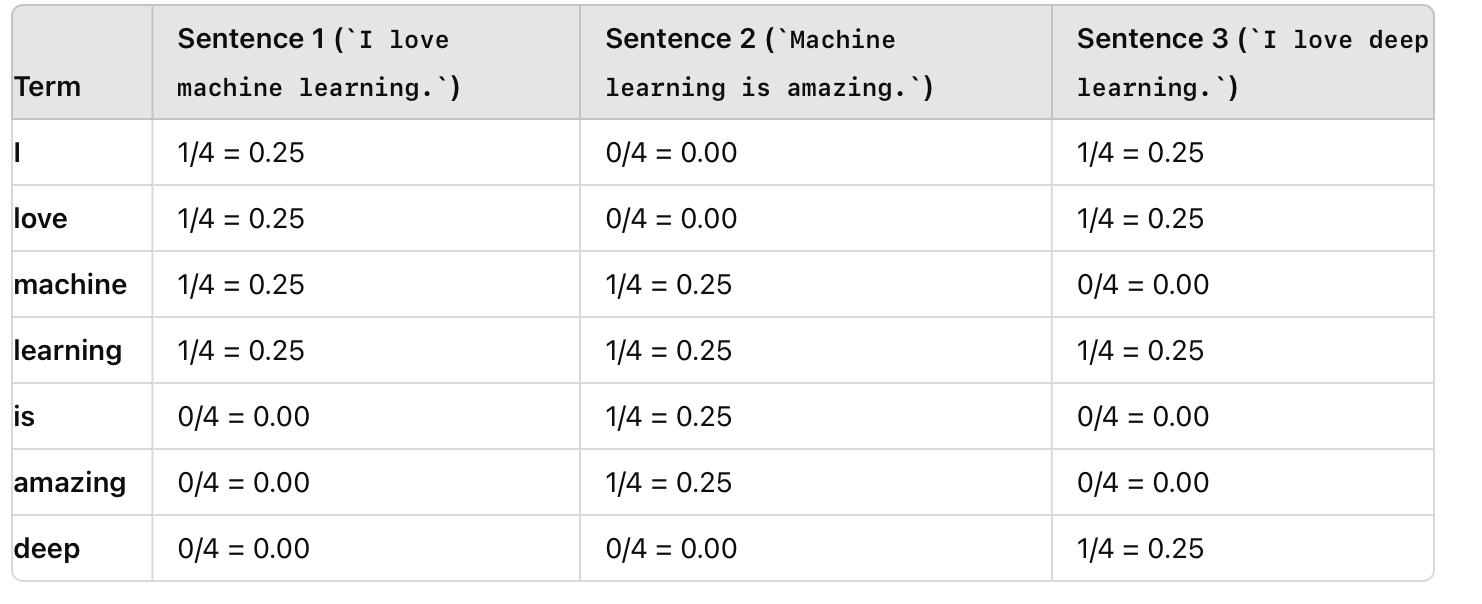




#### Calculate IDF 

IDF = log(number of documents / number of documents containing the term t )
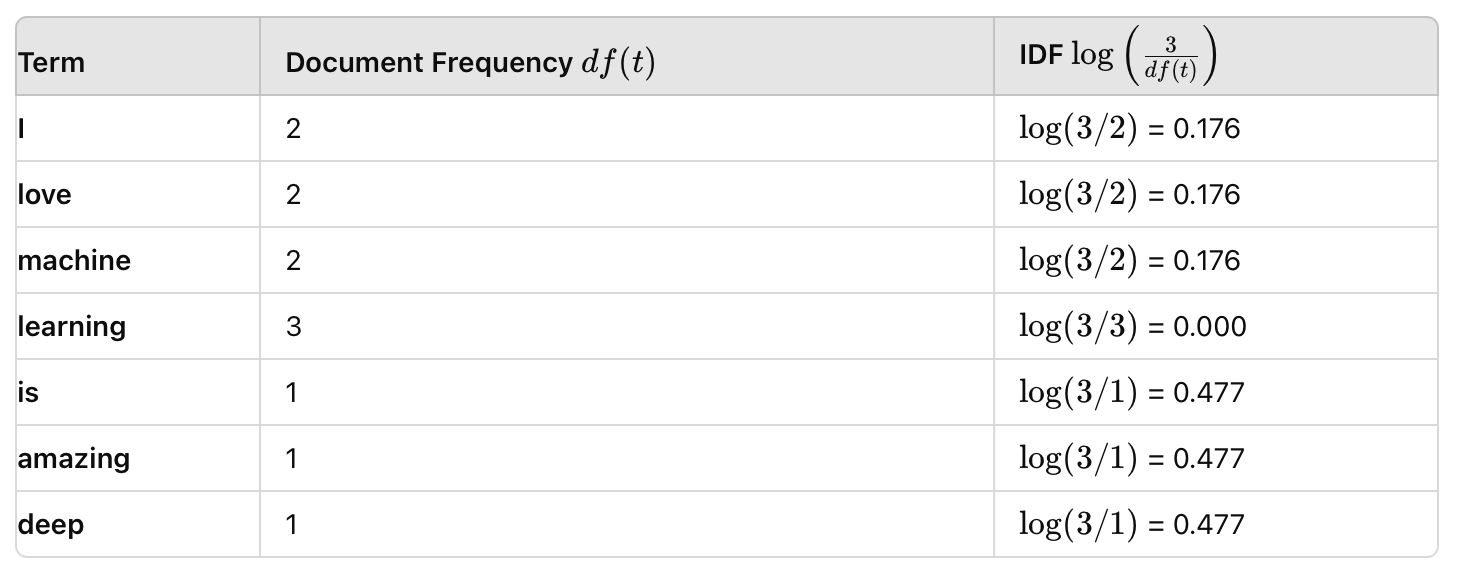

#### Calculate Tf*IDf -- text transformed into feature vectors 

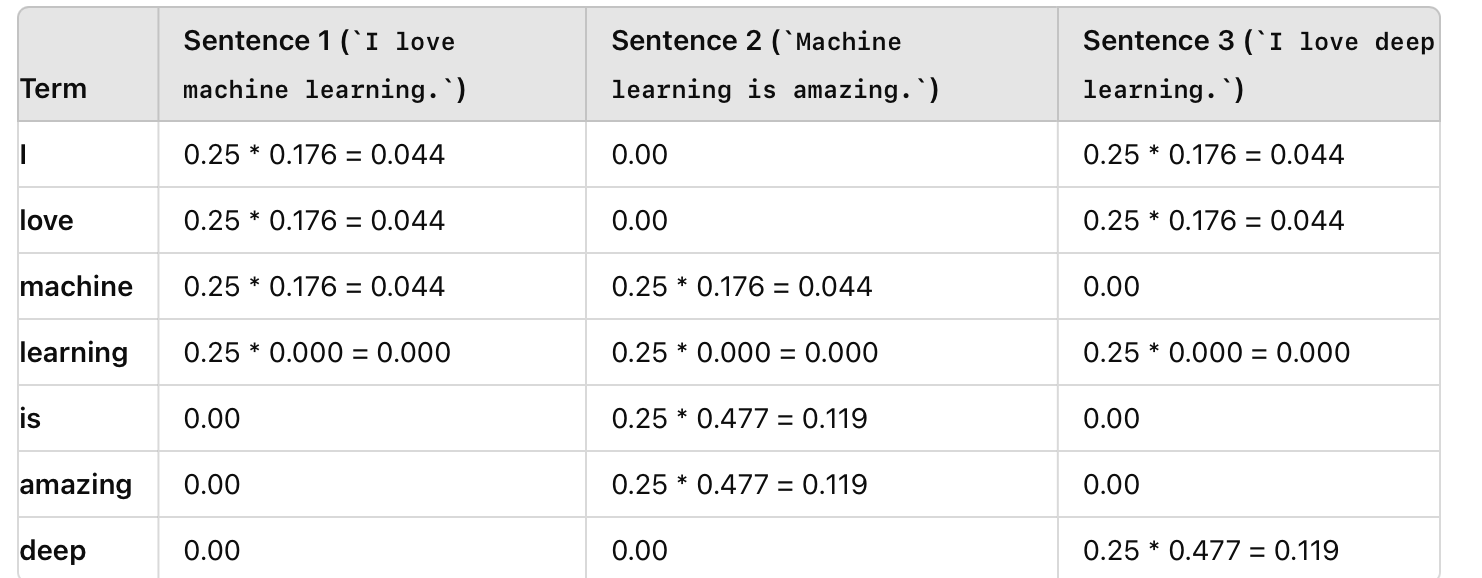



The output has a lot of values that are 0 -- for efficient representation it is converted to sparse matrix as exaplained later in detail 

#### Comparing feature vectors to find the similarity between the feature vectors -- most similar sentences are given as output for the applications/usecases as discussed above




**Cosine similarity** is used for comparing between different sentences or documents in the corpus . these sentences are converted to feature vectors 

For instance if there are three sentences and corresponding terms : 

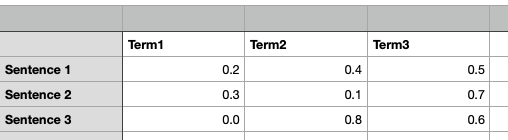

Row 1 (Sent 1): Represents the vector [0.2, 0.4, 0.5,....]

Row 2 (Sent 2): Represents the vector [0.3, 0.1, 0.7,....]

Row 3 (Sent 3): Represents the vector [0.0, 0.8, 0.6,...]

To calculate the cosine similarity between Sent 1 and Sent 2:

1. Compute the dot product of the vectors for Sent 1 and Sent 2.
2. Compute the magnitudes of the vectors for Sent 1 and Sent 2.
3. Divide the dot product by the product of the magnitudes.


Cosine Similarity Matrix:

If you compute the cosine similarity for all pairs of sentences, a similarity matrix is obtained:

Each element [i, j] in the matrix represents the cosine similarity between sent i and sent j.

The diagonal of this matrix will always be 1, because the cosine similarity of a document with itself is always 1.

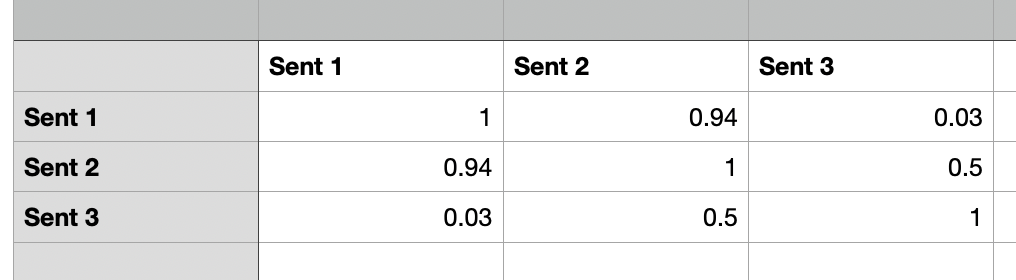


## Code :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import difflib  ## get the input from the user -- to avoid mistakes from user and find a close match from the user
from sklearn.feature_extraction.text import TfidfVectorizer  ## convert textual data into feature vectors
from sklearn.metrics.pairwise import cosine_similarity  ## find highest similarity score between user input and available movies

### Data preprocessing

In [4]:
df = pd.read_csv('../data/movies/movies_1.csv')

In [5]:
df.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [7]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

#### text data selection

In [8]:
selected_features = df[['genres','keywords','tagline','cast','director','overview','popularity']]
selected_features

,genres,keywords,tagline,cast,director,overview,popularity
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",150.437577
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",139.082615
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,A cryptic message from Bond’s past sends him o...,107.376788
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Following the death of District Attorney Harve...,112.312950
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,"John Carter is a war-weary, former military ca...",43.926995
...,...,...,...,...,...,...,...
4798,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,"He didn't come looking for trouble, but troubl...",Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,El Mariachi just wants to play his guitar and ...,14.269792
4799,Comedy Romance,NaN,A newlywed couple's honeymoon is upended by th...,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,A newlywed couple's honeymoon is upended by th...,0.642552
4800,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,NaN,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476
4801,NaN,NaN,A New Yorker in Shanghai,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,When ambitious New York attorney Sam is sent t...,0.857008


In [9]:
selected_features= selected_features.fillna('')
selected_features

,genres,keywords,tagline,cast,director,overview,popularity
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",150.437577
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",139.082615
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,A cryptic message from Bond’s past sends him o...,107.376788
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Following the death of District Attorney Harve...,112.312950
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,"John Carter is a war-weary, former military ca...",43.926995
...,...,...,...,...,...,...,...
4798,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,"He didn't come looking for trouble, but troubl...",Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,El Mariachi just wants to play his guitar and ...,14.269792
4799,Comedy Romance,,A newlywed couple's honeymoon is upended by th...,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns,A newlywed couple's honeymoon is upended by th...,0.642552
4800,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476
4801,,,A New Yorker in Shanghai,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia,When ambitious New York attorney Sam is sent t...,0.857008


### combine #all the selected text features

The idea here is to represent each movie as a single piece of text that captures all of its relevant information (like genre, cast, director, etc.). This combined text acts as a unique "signature" or "profile" for each movie.

 For a movie like Jurassic Park, this might result in a combined string like "Action Adventure Steven Spielberg Dinosaurs, Island, Chaos Life finds a way". This string captures key elements of the movie, making it easier to compare with other movies.

In [10]:
combined_features = selected_features['genres']+selected_features['cast']+selected_features['director']+  \
                    selected_features['keywords']+selected_features['overview']+selected_features['tagline']
combined_features

0       Action Adventure Fantasy Science FictionSam Wo...
1       Adventure Fantasy ActionJohnny Depp Orlando Bl...
2       Action Adventure CrimeDaniel Craig Christoph W...
3       Action Crime Drama ThrillerChristian Bale Mich...
4       Action Adventure Science FictionTaylor Kitsch ...
                              ...                        
4798    Action Crime ThrillerCarlos Gallardo Jaime de ...
4799    Comedy RomanceEdward Burns Kerry Bish\u00e9 Ma...
4800    Comedy Drama Romance TV MovieEric Mabius Krist...
4801    Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...
4802    DocumentaryDrew Barrymore Brian Herzlinger Cor...
Length: 4803, dtype: object

## converting text data to feature vectors

convert this text into numbers (vectors) that a machine learning model can process.

Why TF-IDF? Not all words in the combined text are equally important. For example, common words like "the," "is," or even "movie" don’t tell us much about a specific movie. TF-IDF helps to emphasize more unique and meaningful words while downplaying very common ones.

Term Frequency (TF): How often a word appears in a document (movie description) relative to the total number of words in that document. **Words that appear frequently are generally considered important within that specific document**.


Inverse Document Frequency (IDF): Measures how unique a word is across all documents (movies). **If a word appears in many documents, it’s probably not very useful** for distinguishing between them.


Combining TF and IDF: Multiplying these two gives us a score that reflects the **importance of a word in a document while accounting for its overall rarity in the entire dataset**.**


Example: Words like "Dinosaurs" or "Spielberg" might get higher TF-IDF scores for Jurassic Park because they are **specific and important for that movie**.


When you create a TF-IDF matrix using TfidfVectorizer, the vectorizer first builds a vocabulary from the combined features of all the movies in your dataset.


**The vocabulary is a list of all unique words (or terms) that appear across all movies.**


For example, if the total number of unique words across all movies is 43,864, then the vocabulary size is 43,864.


TF-IDF Vectors:

Each movie is represented by a TF-IDF vector, which has a length equal to the size of the vocabulary.

Therefore, if the vocabulary size is 43,864, every movie's TF-IDF vector will have 43,864 elements.

In [11]:
vectorizer = TfidfVectorizer()

In [12]:
feature_vectors = vectorizer.fit_transform(combined_features)
feature_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 295107 stored elements and shape (4803, 43864)>

In [13]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 295107 stored elements and shape (4803, 43864)>
  Coords	Values
  (0, 617)	0.058708297343748016
  (0, 886)	0.06777804262326148
  (0, 14031)	0.08869539759184561
  (0, 34517)	0.07527367187326474
  (0, 14655)	0.18655528767991444
  (0, 43251)	0.17857707979486181
  (0, 43780)	0.14487411945203824
  (0, 33962)	0.16389883013225084
  (0, 35629)	0.16389883013225084
  (0, 42306)	0.14656850730294985
  (0, 37101)	0.12298467241853127
  (0, 22639)	0.1754108714317678
  (0, 25809)	0.11965661127110466
  (0, 32994)	0.2082817695300908
  (0, 5761)	0.2082817695300908
  (0, 7141)	0.14746338108308935
  (0, 15870)	0.10590833730598093
  (0, 36483)	0.23347738293636225
  (0, 41991)	0.08462865033310599
  (0, 7554)	0.16579675005549516
  (0, 36235)	0.2082817695300908
  (0, 38701)	0.07926665809113505
  (0, 254)	0.18655528767991444
  (0, 6434)	0.12022799652995726
  (0, 29031)	0.19184632048092928
  :	:
  (4802, 13133)	0.09246266830051995
  (4802, 34735)	0.08

In [14]:
feature_vectors.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
pd.DataFrame(feature_vectors.toarray(),columns = vectorizer.get_feature_names_out())

,00,000,007,05,06,07am,08,10,100,1000,...,zwigoffholiday,zyklon,zylka,æon,éloigne,émigré,été,única,über,最后的舞者
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This is a space-efficient way to store large matrices where most elements are zeros.

The matrix has a shape of **(4803, 43864), meaning it has 4803 rows (one for each movie) and 43,864 columns (one for each unique word/term across all movies)**.

43864: Number of unique terms (words, n-grams, etc.) extracted from the combined features across all movies.

Since most movies won't use most words (especially given a vocabulary of 43,864 words), this matrix is mostly zeros, hence the need for a sparse matrix representation.

Movie 0 (Row 0):

(0, 617) 0.058708297343748016: The 618th word in the vocabulary has a small but non-zero importance for this movie.


(0, 43251) 0.17857707979486181: The term corresponding to the 43,252nd word is more important for this movie, as indicated by a higher TF-IDF score.



If a word does not contribute meaningfully to the document (i.e., it has a TF-IDF score of 0), it won’t be included in the sparse matrix.


Each unique word is assigned an index based on its order of appearance or sometimes alphabetically. For example, if the word "action" is the first word it processes, it might be given index 0, "adventure" might get index 1, and so on.


The order of the indices is based on how the vectorizer encounters and processes the words, not necessarily their appearance in your input text.

**If a word appears frequently across many movies (e.g., "movie," "film"), its IDF (Inverse Document Frequency) value will be low. This leads to a lower overall TF-IDF score for that word in any given movie.**


**Words with a TF-IDF score of 0 for a particular document won’t be included in that document's vector in the sparse matrix. This helps keep the matrix sparse (mostly zeros), as only meaningful (non-zero) values are stored.**

Words with a TF-IDF score of 0 are not included in the sparse matrix because they do not contribute to the representation of the movie in a meaningful way. 


As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector, implementations will typically use a sparse representation such as the implementations available in the scipy.sparse package.

### Cosine similarity

 The goal is to find out how similar one movie is to another based on their feature vectors (the numerical representations created in the previous step).
 
Why Cosine Similarity? Cosine similarity measures the angle between two vectors. If two movies are similar, their feature vectors will point in roughly the same direction, resulting in a small angle between them, and thus a high cosine similarity score.

Angle as a Measure of Similarity: Two vectors (movies) that are identical will have a cosine similarity of 1 (angle of 0 degrees). Vectors that are completely different will have a cosine similarity of 0 (angle of 90 degrees).

Usage of Feature Vectors:

Similarity Computation: Once each movie is represented by a feature vector, you can compute the similarity between any two movies by comparing their vectors. For instance, the cosine similarity measures the angle between two vectors; the smaller the angle, the more similar the movies.

Recommendation: When a user likes a particular movie, you find other movies with high cosine similarity to the liked movie and recommend them.

In [17]:
similarity = cosine_similarity(feature_vectors)

In [18]:
print(similarity)

[[1.         0.04608916 0.02118059 ... 0.02508817 0.01107836 0.00663003]
 [0.04608916 1.         0.03952159 ... 0.04917254 0.03049848 0.01619487]
 [0.02118059 0.03952159 1.         ... 0.02571101 0.01156576 0.01469858]
 ...
 [0.02508817 0.04917254 0.02571101 ... 1.         0.03692231 0.02020751]
 [0.01107836 0.03049848 0.01156576 ... 0.03692231 1.         0.03247462]
 [0.00663003 0.01619487 0.01469858 ... 0.02020751 0.03247462 1.        ]]


In [19]:
similarity.shape

(4803, 4803)

In [22]:
pd.DataFrame(similarity,columns=np.arange(similarity.shape[1]),index=np.arange(similarity.shape[0]))

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.046089,0.021181,0.020115,0.073364,0.033218,0.021195,0.058960,0.021824,0.026348,...,0.005906,0.008181,0.035438,0.036959,0.015415,0.015637,0.008206,0.025088,0.011078,0.006630
1,0.046089,1.000000,0.039522,0.032389,0.063488,0.037371,0.032218,0.082698,0.060383,0.042624,...,0.015267,0.017652,0.034249,0.042191,0.046908,0.037877,0.016824,0.049173,0.030498,0.016195
2,0.021181,0.039522,1.000000,0.032494,0.029819,0.018011,0.016930,0.077626,0.021812,0.033359,...,0.040671,0.002836,0.014699,0.011647,0.029779,0.023901,0.005157,0.025711,0.011566,0.014699
3,0.020115,0.032389,0.032494,1.000000,0.029433,0.028215,0.037262,0.064236,0.044315,0.110103,...,0.019647,0.010857,0.044498,0.034324,0.026296,0.037035,0.014165,0.048240,0.047796,0.027435
4,0.073364,0.063488,0.029819,0.029433,1.000000,0.050595,0.039853,0.072795,0.022345,0.050418,...,0.020022,0.012702,0.032642,0.038235,0.051446,0.042609,0.009522,0.044064,0.028003,0.020790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.015637,0.037877,0.023901,0.037035,0.042609,0.019392,0.040153,0.059541,0.027869,0.018739,...,0.005943,0.018683,0.054201,0.015677,0.056242,1.000000,0.003316,0.017727,0.031082,0.026098
4799,0.008206,0.016824,0.005157,0.014165,0.009522,0.010014,0.010581,0.010786,0.004747,0.004733,...,0.000000,0.002862,0.011287,0.015696,0.010160,0.003316,1.000000,0.020869,0.011082,0.005994
4800,0.025088,0.049173,0.025711,0.048240,0.044064,0.039266,0.036398,0.031916,0.033308,0.026382,...,0.012899,0.017832,0.039312,0.048538,0.024840,0.017727,0.020869,1.000000,0.036922,0.020208
4801,0.011078,0.030498,0.011566,0.047796,0.028003,0.019373,0.031871,0.030001,0.030829,0.020880,...,0.004246,0.014930,0.027509,0.026114,0.036258,0.031082,0.011082,0.036922,1.000000,0.032475


### User input

In [26]:
movie_name_user = input('Enter your movie preference : ')

In [27]:
movie_name_user

'superman'

### list of all the names of movies in the database

In [28]:
movie_name_list = df['title'].tolist()

In [29]:
movie_name_list

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

### finding the close match of the movie name given by the user -- this just in case there is a typo in the user input

In [31]:
close_match = difflib.get_close_matches(movie_name_user,movie_name_list)
close_match

['Superman', 'Superman II', 'Superman III']

Sequence Matching: It uses a form of fuzzy matching based on the Ratcliff/Obershelp algorithm, which measures the similarity between sequences (in this case, strings).

The algorithm works by finding the longest contiguous matching subsequence between two strings (or sequences).
It then recursively applies the same process to the substrings that lie on either side of this matching subsequence.


If you compare the strings "The Matrix" and "The Matr," the algorithm:

Finds "The Matr" as the longest matching subsequence.
Calculates the similarity ratio based on the matching characters.
Uses this ratio to determine how closely "The Matr" resembles "The Matrix."

In [32]:
close_match = close_match[0]
close_match

'Superman'

#### finding index of the movie with this user input title

Similarity matrix is based on the index values for 4803 movies.. if we get this index of the movie that user has given input or the closest name possible -- then we can use similarity matrix and get the closest similarity movies

In [33]:
user_movie_index = df[df.title == close_match]['index'].values[0]
user_movie_index

813

### Similarity scores from the matrix 

In [34]:
similarity[user_movie_index]

array([0.03597763, 0.05190573, 0.02732316, ..., 0.02624331, 0.02404111,
       0.04024901])

In [35]:
similarity_score = list(enumerate(similarity[user_movie_index]))
similarity_score[0:10]

[(0, 0.03597762615113519),
 (1, 0.05190572711612225),
 (2, 0.02732315702533052),
 (3, 0.05265715758115604),
 (4, 0.05528567569976444),
 (5, 0.07231146143742537),
 (6, 0.02365951557549582),
 (7, 0.06525092163154542),
 (8, 0.025679709602717506),
 (9, 0.07869997650039783)]

just enumerating the list with index of the movie  -- so that we can have the index of the movie with high similarity score -- this index is used to extract the movie name

In [36]:
len(similarity_score) ## for all the movies

4803

### sort the list based on higher similarity score 

In [37]:
sorted(similarity_score, reverse=True)[0:10]

[(4802, 0.04024901447729568),
 (4801, 0.02404111100571873),
 (4800, 0.02624330726500487),
 (4799, 0.004477269256293903),
 (4798, 0.02520410812839215),
 (4797, 0.02940143050039729),
 (4796, 0.026341102586891426),
 (4795, 0.022851767453466416),
 (4794, 0.01714015504890613),
 (4793, 0.011158471984607975)]

This is just sorting the values based on index -- in the reverse order -- but we want to sort the values based on similarity score 

In [38]:
sorted_similarity_score = sorted(similarity_score, key = lambda x:x[1], reverse=True)
sorted_similarity_score[0:10]

[(813, 1.0000000000000002),
 (2433, 0.35516792017958715),
 (870, 0.3117106601999757),
 (1296, 0.18376337758717495),
 (10, 0.18022703251248637),
 (14, 0.15924388836357617),
 (72, 0.10982491530029054),
 (3583, 0.09371538772724708),
 (79, 0.09143571872058123),
 (4659, 0.08976145224617513)]

#### Results with names of similar movies based on index

In [39]:
similarmovie_indices = [idx for idx, score in sorted_similarity_score[0:10]]
similarmovie_indices

[813, 2433, 870, 1296, 10, 14, 72, 3583, 79, 4659]

In [40]:
movie_titles = df.loc[similarmovie_indices, 'title']
movie_titles

813                             Superman
2433    Superman IV: The Quest for Peace
870                          Superman II
1296                        Superman III
10                      Superman Returns
14                          Man of Steel
72                         Suicide Squad
3583                   Our Idiot Brother
79                            Iron Man 2
4659                          Horse Camp
Name: title, dtype: object

In [41]:
movie_titles.to_list()

['Superman',
 'Superman IV: The Quest for Peace',
 'Superman II',
 'Superman III',
 'Superman Returns',
 'Man of Steel',
 'Suicide Squad',
 'Our Idiot Brother',
 'Iron Man 2',
 'Horse Camp']

References:

chat-gpt 

https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

https://colab.research.google.com/drive/1rXW-cwCVDHmuhEmRGw047yjkn_KVWPxE?usp=sharing



